<a href="https://colab.research.google.com/github/tofighi/Public/blob/master/concentration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tofighi/Public/master/data/data.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/tofighi/Public/master/data/01.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/tofighi/Public/master/data/02.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/tofighi/Public/master/data/03.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/tofighi/Public/master/data/04.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/tofighi/Public/master/data/05.csv')

df

,concentration,Duplicates,Duplicates.1,instrumant readings,Normalise
0,0,0.1156,0.1052,0.11040,0.00000
1,25,0.1504,0.1488,0.14960,0.03920
2,125,0.3443,0.3277,0.33600,0.22560
3,250,0.5418,0.5268,0.53430,0.42390
4,500,0.8895,0.8771,0.88330,0.77290
5,750,1.1416,1.1751,1.15835,1.04795
6,1000,1.4563,1.4242,1.44025,1.32985
7,1500,2.0348,2.0093,2.02205,1.91165
8,2000,2.5256,2.4531,2.48935,2.37895


In [3]:
df2 = df[['concentration','instrumant readings']]
df2

,concentration,instrumant readings
0,0,0.11040
1,25,0.14960
2,125,0.33600
3,250,0.53430
4,500,0.88330
5,750,1.15835
6,1000,1.44025
7,1500,2.02205
8,2000,2.48935


In [0]:
def p(x):
    return 6*x**5 - 2*x**4 +3 * x**2 + 2 * x + 1

In [0]:
np.random.seed(145837)


In [0]:
N = 12
var = 10**-1

left = -1
right = 3

xs = stats.uniform.rvs(left, right, size=N)
eps = stats.norm.rvs(0, np.sqrt(var), size=N)
ys = p(xs) + eps


In [7]:
xs = df2['concentration']
print(xs)
ys = df2['instrumant readings']
print(ys)

0       0
1      25
2     125
3     250
4     500
5     750
6    1000
7    1500
8    2000
Name: concentration, dtype: int64
0    0.11040
1    0.14960
2    0.33600
3    0.53430
4    0.88330
5    1.15835
6    1.44025
7    2.02205
8    2.48935
Name: instrumant readings, dtype: float64


In [8]:
scaler = StandardScaler()
scaler.fit(df2)
df2_norm=scaler.transform(df2)
df2_norm

array([[-1.03293895, -1.13850406],
       [-0.9951485 , -1.08909887],
       [-0.8439867 , -0.85417213],
       [-0.65503445, -0.60424738],
       [-0.27712996, -0.1643899 ],
       [ 0.10077453,  0.18226566],
       [ 0.47867902,  0.53755461],
       [ 1.23448801,  1.27081842],
       [ 1.990297  ,  1.85977364]])

In [0]:
ys = df2_norm[:,[0]].ravel()
#print(xs)
xs = df2_norm[:,[1]].ravel()
#print(ys)

In [10]:
xs = df2['concentration']
print(xs)
ys = df2['instrumant readings']
print(ys)

0       0
1      25
2     125
3     250
4     500
5     750
6    1000
7    1500
8    2000
Name: concentration, dtype: int64
0    0.11040
1    0.14960
2    0.33600
3    0.53430
4    0.88330
5    1.15835
6    1.44025
7    2.02205
8    2.48935
Name: instrumant readings, dtype: float64


In [0]:
class PolynomialRegression(BaseEstimator):
    def __init__(self, deg=None):
        self.deg = deg
    
    def fit(self, X, y, deg=None):
        self.model = LinearRegression(fit_intercept=False)
        self.model.fit(np.vander(X, N=self.deg + 1), y)
    
    def predict(self, x):
        return self.model.predict(np.vander(x, N=self.deg + 1))
    
    @property
    def coef_(self):
        return self.model.coef_

In [12]:
known_degree_model = PolynomialRegression(deg=3)
known_degree_model.fit(xs, ys)
known_degree_model.coef_

array([ 7.86795942e-11, -3.94533476e-07,  1.66224251e-03,  1.21636899e-01])

In [0]:
overfit_model = PolynomialRegression(deg=N - 1)
overfit_model.fit(xs, ys)

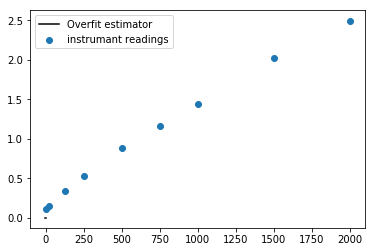

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

plot_xs = np.linspace(left, right, (right - left) * 100)

ax.scatter(xs, ys);
ax.plot(plot_xs, np.clip(overfit_model.predict(plot_xs), -1, 7), color='k', label='Overfit estimator');
#ax.plot(plot_xs, p(plot_xs), color='r', label='True polynomial');
ax.legend(loc=2);

In [15]:
mean_squared_error(overfit_model.predict(xs), ys)


0.0013542399754743065

In [16]:
N_prediction = 10

prediction_xs = stats.uniform.rvs(left, right, size=N_prediction)
prediction_eps = stats.norm.rvs(0, np.sqrt(var), size=N_prediction)
prediction_ys = p(prediction_xs) + prediction_eps

mean_squared_error(overfit_model.predict(prediction_xs), prediction_ys)

19.30151937462

In [0]:
estimator = PolynomialRegression()
degrees = np.arange(1, 25)
cv_model = GridSearchCV(estimator,
                        cv=3,
                        param_grid={'deg': degrees},
                        scoring='neg_mean_squared_error')
cv_model.fit(xs, ys);


In [18]:
cv_model.best_params_, cv_model.best_estimator_.coef_

({'deg': 1}, array([0.00119512, 0.19706564]))

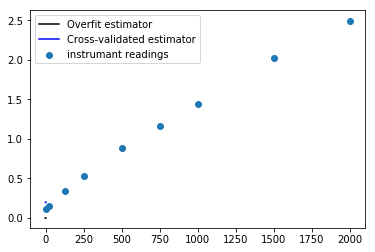

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(xs, ys);
ax.plot(plot_xs, np.clip(overfit_model.predict(plot_xs), -1, 7), color='k', label='Overfit estimator');
plt.plot(plot_xs, cv_model.predict(plot_xs), color='b', label='Cross-validated estimator');
#ax.plot(plot_xs, p(plot_xs), color='r', label='True polynomial');
ax.legend(loc=2);

In [20]:
mean_squared_error(cv_model.predict(xs), ys)


0.004456779649714266

In [21]:
mean_squared_error(cv_model.predict(prediction_xs), prediction_ys)


18.015547675186586

Text(0.5, 0, 'Polynomial Degree')

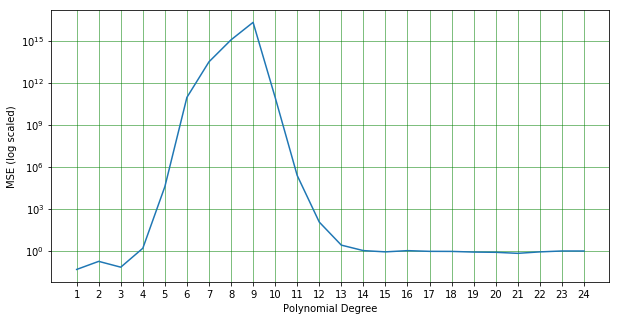

In [22]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

cv_model.cv_results_

#scores = np.array([mean_test_score in cv_model.cv_results_])
scores= cv_model.cv_results_['mean_test_score']

ax.plot(degrees, -scores)
plt.xticks(np.arange(1, np.max(degrees)+1, step=1))
plt.grid(color='g', linestyle='-', linewidth=.5)
ax.set_yscale('log')
ax.set_ylabel('MSE (log scaled)')
ax.set_xlabel('Polynomial Degree')